### Being a student in data science field, i aspire to become a data scientist. I should probably start applying for the jobs in few months for my full time job. I thought i could use the concept of the scrapping in the jobs hunt search which could be useful for the students like me. I have used the "Indeed.com" to search for the jobs present in the United States. The below python code uses the beautiful soup to scrape the Jobs related to the " Data Scientist" role from the indeed.com. The script provides the analysis such as top 10 companies, top 10 roles , top 10 locations for the data scientist jobs in United States.

In [1]:
#Importing all the required packages

import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#checking the response for the apartments.com website
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36"}
url = 'https://www.indeed.com/jobs?q=data%20scientist&l=Chicago%2C%20IL&start=00'

response = requests.get(url, headers=headers)

In [3]:
#Storing all the child pages in the website to scrape the data 

url_lists = []
for i in range(0,200,10):
    url_lists.append(f'https://www.indeed.com/jobs?q=data%20scientist&l=United%20States&start={i}')

In [4]:
#Creating the beautiful soup object

soup = BeautifulSoup(response.text, 'html.parser')

soup1 = soup.find("ul", class_ = "jobsearch-ResultsList css-0")

title = soup1.find_all("a", class_ = "jcs-JobTitle css-jspxzf eu4oa1w0")    

In [5]:
name = soup1.find_all("span", class_ = "companyName")

In [6]:
location = soup1.find_all("div", class_ = "companyLocation")

In [7]:
description = soup1.find_all("div", class_ = "job-snippet")

In [8]:
salary = soup1.find_all("span", class_ = "estimated-salary")

In [9]:
typee = soup1.find_all("div", class_ = "attribute_snippet")

In [10]:
job_title = []
job_name = []
job_location = []
job_description= []
job_salary = []
job_typee = []

In [11]:
#Looping through the URLs and collecting the required data for the information we needed

for url_list in url_lists:
    
    response = requests.get(url_list, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    soup1 = soup.find("ul", class_ = "jobsearch-ResultsList css-0")
    title_ = soup1.find_all("a", class_ = "jcs-JobTitle css-jspxzf eu4oa1w0")
    name_ = soup1.find_all("span", class_ = "companyName")
    location_ = soup1.find_all("div", class_ = "companyLocation")
    description_ = soup1.find_all("div", class_ = "job-snippet")
    salary_ = soup1.find_all("span", class_ = "estimated-salary")
    typee_ = soup1.find_all("div", class_ = "attribute_snippet")
    
    for title, name, location, description, sal, typ in zip(title_ ,name_, location_, description_, salary_,typee_ ) :
        job_title.append(title.get_text().strip())
        job_name.append(name.get_text().strip())
        job_location.append(location.get_text().strip())
        job_description.append(description.get_text().strip())
        job_salary.append(sal.get_text())
        job_typee.append(typ.get_text().strip())
       

In [12]:
df = pd.DataFrame({"Title":job_title, "Company Name": job_name, "Location": job_location, "Summary": job_description, "Salary" : job_salary, "Type" : job_typee}, columns = ['Title', 'Company Name', 'Location','Summary', 'Salary' , 'Type'])

In [13]:
df.head()

,Title,Company Name,Location,Summary,Salary,Type
0,Data Scientist-Modeling,L. L. Bean,"Freeport, ME",The data scientist will develop and test predi...,Estimated $90.6K - $115K a year,Full-time
1,Data Scientist,Toyota,"Plano, TX 75023+3 locations","Present machine learning models outcomes, and ...",Estimated $94.3K - $119K a year,Full-time
2,Data Science Assistant,United Nations,"New York, NY",A minimum of five years of experience in data ...,Estimated $128K - $162K a year,"$5,000 - $10,000 a month"
3,Data Scientist,Starz,"New York, NY 10036",The Data Scientist understands how to use data...,Estimated $105K - $133K a year,Full-time
4,Data Scientist 1,Humana,"Green Bay, WI 54344+4 locations",0-3 years of technical experience.\nUnderstand...,Estimated $110K - $140K a year,"$139,000 - $276,000 a year"


##### DATA PRE PROCESSING

In [14]:
df.isnull().values.any()

False

In [15]:
df = df.astype(str)

In [16]:
df['Salary'] = df['Salary'].str[11:22]
df['Salary'] = df['Salary'].str.replace("K", "")
df['Salary'] = df['Salary'].str.replace("$", "")
df[["Min - Sal", "Max - Sal"]] = df["Salary"].str.split("-", expand=True)

In [17]:
df['Max - Sal'] = df['Max - Sal'].astype(float)
df['Min - Sal'] = df['Min - Sal'].astype(float)

In [18]:
df['Avg'] = df[["Min - Sal", "Max - Sal"]].mean(axis=1)

<AxesSubplot:>

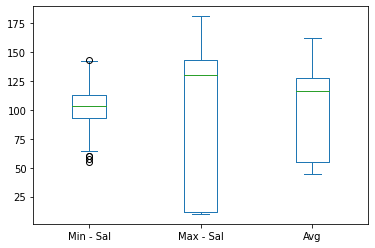

In [19]:
df.plot.box()

##### Checking the different combinations of group by and its plots to analyse the scrapped data

In [20]:
df1 = df.groupby('Title')
df1.first()

,Company Name,Location,Summary,Salary,Type,Min - Sal,Max - Sal,Avg
Title,,,,,,,,
(Junior / Senior) Data Scientist - Sports Analytics,Zelus Analytics,"Remote in Austin, TX",Provide guidance and technical mentorship for ...,99.3 - 12,"$75,000 - $150,000 a year",99.3,12.0,55.65
AI/ML/Data Scientist,Beth Israel Deaconess Medical Center,"Boston, MA",Job Summary: The Data Scientist will be an MEn...,101 - 128,Full-time,101.0,128.0,114.50
Advanced Data Scientist,ResMed,"San Diego, CA 92123 (Kearny Mesa area)",You will mentor and train more junior team mem...,119 - 150,Full-time,119.0,150.0,134.50
Applied Data Scientist (Remote),Leaf Logistics,Remote,Leaf offers a very comprehensive compensation ...,101 - 128,Full-time,101.0,128.0,114.50
Applied Scientist,Amazon.com Services LLC,+126 locationsRemote,As a member of a highly leveraged team of tale...,99.8 - 12,"$136,000 - $184,200 a year",99.8,12.0,55.90
...,...,...,...,...,...,...,...,...
Staff Data Scientist,"Employment Opportunities at BuzzFeed, Inc.","Remote in New York, NY",Lead a group of 3-5 ML scientists and engineer...,116 - 147,Full-time,116.0,147.0,131.50
Sustainability Data Scientist,Driscoll's,"Watsonville, CA",You will help translate these data insights in...,107 - 136,Full-time,107.0,136.0,121.50
VIE New York City- Data Scientist,L'Oreal,"New York, NY","Data Scientist, L'Oréal USA – New York City VI...",108 - 136,"$110,000 - $160,000 a year",108.0,136.0,122.00


In [21]:
df2 = df.groupby('Type')
df2.first()

,Title,Company Name,Location,Summary,Salary,Min - Sal,Max - Sal,Avg
Type,,,,,,,,
"$100,478 - $135,409 a year",DATA SCIENTIST,Los Angeles County Department of Human Resources,"Los Angeles County, CA+4 locations",Four (4) years of experience applying machine ...,97.1 - 12,97.1,12.0,54.55
$102 - $112 an hour,Data Scientist - 4418074,Accenture,"Austin, TX+126 locations","Apply your expertise in quantitative analysis,...",120 - 151,120.0,151.0,135.50
"$110,000 - $150,000 a year",MACHINE LEARNING DATA SCIENTIST - PYTHON AND R,InspiHER Tech,Remote,"Leverage those data via machine learning, pred...",90.1 - 11,90.1,11.0,50.55
"$110,000 - $160,000 a year",VIE New York City- Data Scientist,L'Oreal,"New York, NY","Data Scientist, L'Oréal USA – New York City VI...",108 - 136,108.0,136.0,122.00
"$112,187 - $173,922 a year",Data scientist,Avila Trading,"San Francisco, CA","(Ability to write functions, clean and efficie...",60.2 - 76,60.2,76.0,68.10
"$115,000 a year",Data Scientist,Comcentric,"Remote in Boise, ID+13 locations","Mentor and grow other software engineers, data...",110 - 139,110.0,139.0,124.50
"$125,000 - $175,000 a year","Data Scientist, Creative Cloud Education",Adobe,"San Francisco, CA+6 locations",Prioritize and lead deep dives into Adobe prod...,122 - 155,122.0,155.0,138.50
"$135,000 - $175,000 a year",Data Scientist,Paramount Networks International,"New York, NY 10036+6 locations",Experience of working on a project end-to-end:...,103 - 131,103.0,131.0,117.00
"$135,200 - $223,100 a year",Director and Data Scientist (REMOTE),"The Travelers Companies, Inc.","Remote in Hartford, CT+6 locations","Heavy concentration in mathematics, including ...",101 - 128,101.0,128.0,114.50


In [22]:
df['Title'].value_counts()

Data Scientist                                              65
Senior Data Scientist                                        7
Data Scientist II                                            5
Junior Data Scientist                                        4
Data Scientist I                                             4
                                                            ..
Data Scientist (3-5 years experience)                        1
Data Scientist, ZP-1560-II/III, BEA-DE-VFP                   1
Data Scientist, Data Quality Engineer                        1
Lead Data Scientist                                          1
Biological Science Assistant ( Field and Data Assistant)     1
Name: Title, Length: 79, dtype: int64

In [23]:
df['Location'].value_counts()

Remote                                   11
+1 locationRemote                         4
New York, NY                              4
Remote in Los Angeles, CA                 2
Boston, MA                                2
                                         ..
McLean, VA 22101+3 locations              1
Saint Paul, MN 55107 (West Side area)     1
Iselin, NJ 08830                          1
Remote in San Jose, CA+1 location         1
McLean, VA+1 location                     1
Name: Location, Length: 138, dtype: int64

Title                                                Location                                 
(Junior / Senior) Data Scientist - Sports Analytics  Remote in Austin, TX                         1
AI/ML/Data Scientist                                 Boston, MA                                   1
Advanced Data Scientist                              San Diego, CA 92123 (Kearny Mesa area)       1
Applied Data Scientist (Remote)                      Remote                                       1
Applied Scientist                                    +126 locationsRemote                         1
                                                                                                 ..
Staff Data Scientist                                 Remote in New York, NY+1 location            1
Sustainability Data Scientist                        Watsonville, CA                              1
VIE New York City- Data Scientist                    New York, NY                                 1
Vitri

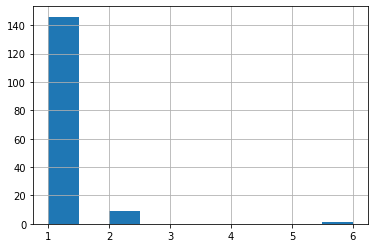

In [24]:
#Location and Title based on the Avg Sal counts.

df3 = df.groupby(['Title', 'Location']).count()['Avg']
print(df3)
df3.hist()
plt.show()

<AxesSubplot:>

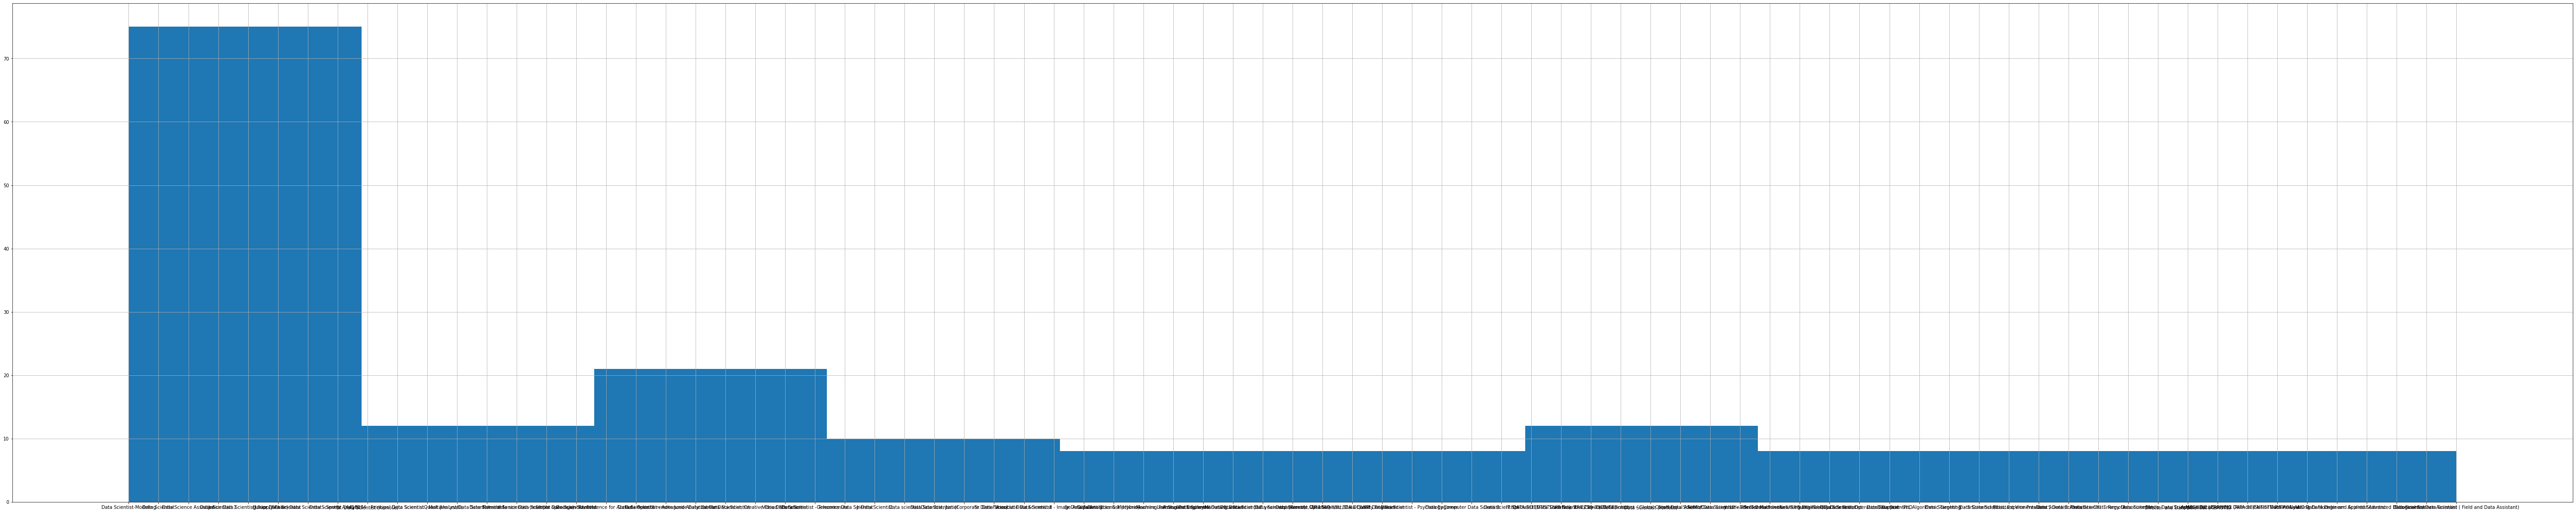

In [34]:
plt.figure(figsize=(100, 20))
df['Title'].hist()

<AxesSubplot:>

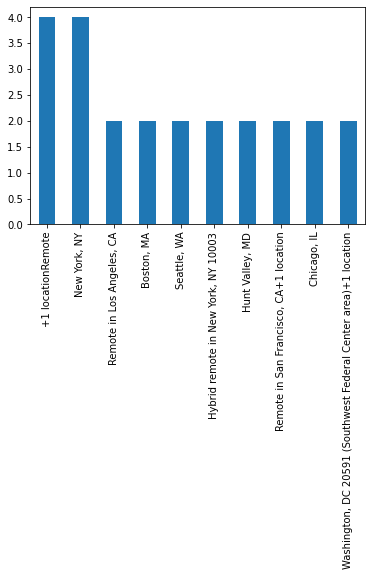

In [35]:
#Plot Showing the locations for the jobs hunt

top10_locations=df['Location'].value_counts()
top10_locations=top10_locations[1:11]
top10_locations.plot.bar()

#### From the above it can be said that,Most of the jobs that are being offered for the Data Scientists roles, are the Remote jobs, Following this the cities like San Franscisco, CA ( Both In person , remote ) are shown.

<AxesSubplot:>

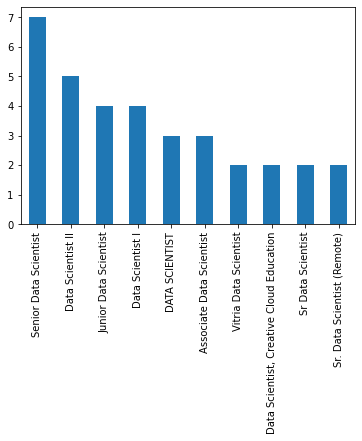

In [36]:
#Plot Showing the Top 10 Titles count.

top10_Title=df['Title'].value_counts()
top10_Title=top10_Title[1:11]
top10_Title.plot.bar()

#### From the above it can be said that, Out of all the roles available, Senior Data Scientist Roles is the most offered role followed by the junior Data Scientist role

<AxesSubplot:>

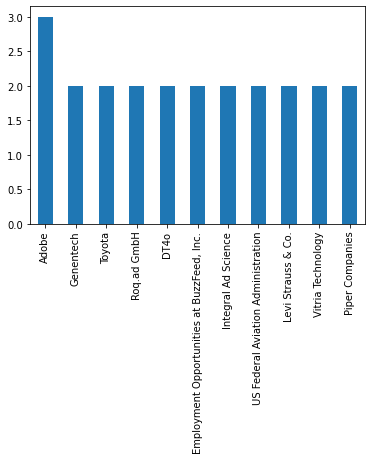

In [37]:
#Plot Showing the Top 10 company counts.

top10_company=df['Company Name'].value_counts()
top10_company=top10_company[:11]
top10_company.plot.bar()

#### From the above it can be said that, onebridge, Mercury etc are all currently offering the samilar job oppurtunities in the current senario